In [121]:
LAMBDA = 1000
LAMBDAS = [0, 0.01, 0.1, 1, 10, 100, 1000]

In [122]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import re
import pandas as pd

In [123]:
with open("house_scale.txt") as f:
    data = f.read()

In [124]:
formatted_data = re.sub(r"\S+:", ",", data)

In [125]:
with open("test.csv", "w") as f:
    f.write(formatted_data)

In [126]:
df = pd.read_csv("test.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,24.0,-1.000000,-0.64,-0.864370,-1,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640
1,21.6,-0.999528,-1.00,-0.515396,-1,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060
2,34.7,-0.999529,-1.00,-0.515396,-1,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068
3,33.4,-0.999414,-1.00,-0.873900,-1,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223
4,36.2,-0.998590,-1.00,-0.873900,-1,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325


In [127]:
data = df.to_numpy()

In [128]:
Y = data[:, 0]
X = data[:, 1:]

In [129]:
Y.ndim, X.shape

(1, (506, 13))

In [130]:
X.shape, Y.shape

((506, 13), (506,))

In [131]:
n_samples, n_features = X_train.shape

In [133]:
n_samples

400

In [134]:
"""
This class is for Ridge Linear Regression and Lasso Linear Regression
"""

class LinearRegression:
    def __init__(self, model_name: str, alpha):
        if model_name not in ["ridge", "lasso"]:
            print("Only serves Ridge and Lasso linear regression")
            exit(0)
        else:
            self.model_name = model_name
            if model_name == "ridge":
                self.model = Ridge(alpha = alpha)
            else:
                self.model = Lasso(alpha = alpha)

    @property
    def name(self):
        return self.model_name
    
    """
        X: [n_samples x n_features]
        Y: [n_samples,]
    """
    def train(self, X, Y):
        self.model.fit(X, Y)
    
    """
    Return:
        bias: scalar
        weights: [n_features,]
    """
    def get_weights(self):
        return {"bias": self.model.intercept_,
                "weights": self.model.coef_}
    
    """
    Return:
        MSE loss: scalar
    """
    def get_mse_loss(self, X, Y):
        y_pred = self.model.predict(X)
        mse = mean_squared_error(Y, y_pred)
        return np.sqrt(mse)
    

    def print_params(self):
        params = self.get_weights()
        print(f"{self.model_name.capitalize()} bias and weights:")
        print(f"\tBias w0 = {np.round(params['bias'], 4)}")
        print(f"\tw.T = {np.round(params['weights'], 4)}")

In [135]:
model_names = ["ridge", "lasso"]
errors = {}
for names in model_names:
    errors[names] = {
        "training_errors": {},
        "testing_errors": {}
    }

X_train, X_test = X[:400], X[400:]
Y_train, Y_test = Y[:400], Y[400:]
for l in LAMBDAS:
    ridge = LinearRegression("ridge", l/n_samples)
    lasso = LinearRegression("lasso", l/n_samples)
    models = [ridge, lasso]
    
    for model in models:
        model.train(X_train, Y_train)
        errors[model.name]["training_errors"][l] = model.get_mse_loss(X_train, Y_train)
        errors[model.name]["testing_errors"][l] = model.get_mse_loss(X_test, Y_test)

C:\Users\Gia Khanh\AppData\Local\Temp\ipykernel_9936\566955264.py:26: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.model.fit(X, Y)
C:\Users\Gia Khanh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gia Khanh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.461e+03, tolerance: 3.352e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mode

In [136]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=5, shuffle=True)

In [137]:
kf.get_n_splits(X_train)

5

In [138]:
    print(len(train_idx))

320


In [139]:
iter(kf.split(X))

<generator object _BaseKFold.split at 0x0000017770FA1AF0>

In [ ]:
k = 5
kf = KFold(n_splits=5, shuffle=True)
val_errors = {name: {} for name in model_names}

    
for l in LAMBDAS:
    val_errors_lambda = {name: [] for name in model_names}

    for train_idx, val_idx in kf.split(X_train):
        X_train_kf, X_val_kf = X_train[train_idx], X_train[val_idx]
        Y_train_kf, Y_val_kf = Y_train[train_idx], Y_train[val_idx]

        ridge = LinearRegression("ridge", l/n_samples)
        lasso = LinearRegression("lasso", l/n_samples)
        models = [ridge, lasso]
        
        for model in models:
            model.train(X_train_kf, Y_train_kf)
            val_errors_lambda[model.name].append(model.get_mse_loss(X_val_kf, Y_val_kf))
    
    for name in model_names:
        val_errors[name][l] = np.mean(val_errors_lambda[name])
            

In [144]:
ridge = LinearRegression("ridge", 0.1/n_samples)
lasso = LinearRegression("lasso", 0.1/n_samples)
models = [ridge, lasso]
        
for model in models:
    model.train(X_train, Y_train)
    print(model.name, model.get_mse_loss(X_test, Y_test))

ridge 6.155699012995999
lasso 6.1476992143955185


In [141]:
np.argmin(list(val_errors["ridge"].values()))

2

In [142]:
np.argmin(list(val_errors["lasso"].values()))

2

In [143]:
val_errors["ridge"]

{0: 4.987382274770555,
 0.01: 5.129880210472845,
 0.1: 4.892679557155466,
 1: 5.054513288666351,
 10: 4.925238747783887,
 100: 4.9778536611752315,
 1000: 4.986138508191425}

In [146]:
np.argmin(list(errors["lasso"]["training_errors"].values()))

0

In [ ]:
errors["lasso"]["testing_errors"][0]

{0: 6.155792280413741,
 0.01: 6.155495511199555,
 0.1: 6.152827074111483,
 1: 6.1266348208733294,
 10: 5.9169816386812535,
 100: 5.592560409495196,
 1000: 4.534411617551291}

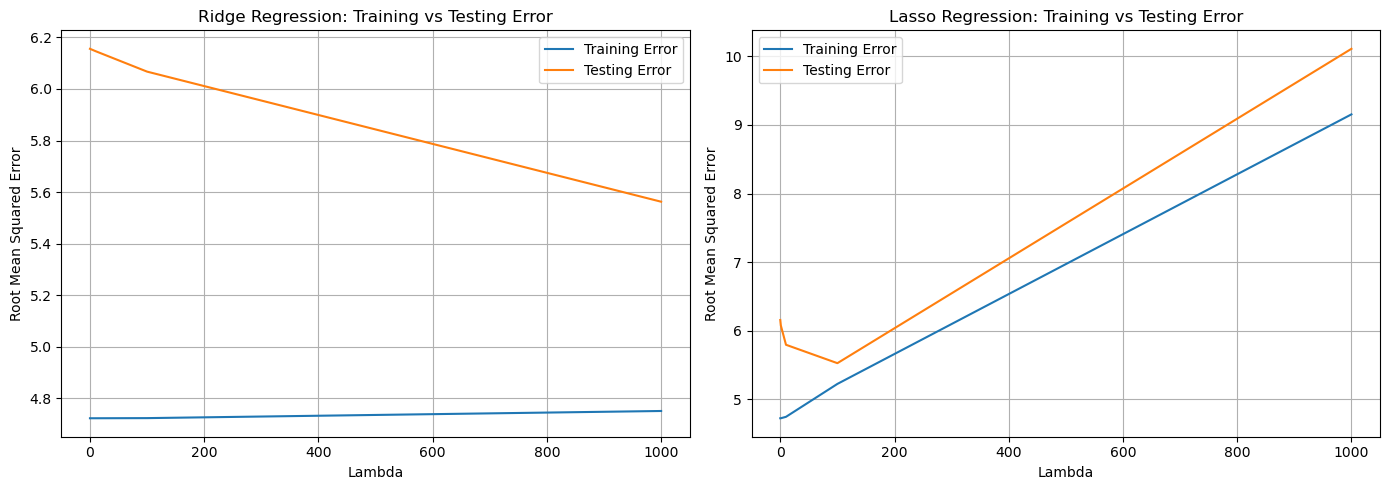

In [147]:
plt.figure(figsize=(14, 5))

# --- Ridge subplot ---
plt.subplot(1, 2, 1)
plt.plot(LAMBDAS, errors["ridge"]["training_errors"].values(), label="Training Error")
plt.plot(LAMBDAS, errors["ridge"]["testing_errors"].values(), label="Testing Error")
plt.title("Ridge Regression: Training vs Testing Error")
plt.xlabel("Lambda")
plt.ylabel("Root Mean Squared Error")
plt.legend()
plt.grid(True)

# --- Lasso subplot ---
plt.subplot(1, 2, 2)
plt.plot(LAMBDAS, errors["lasso"]["training_errors"].values(), label="Training Error")
plt.plot(LAMBDAS, errors["lasso"]["testing_errors"].values(), label="Testing Error")
plt.title("Lasso Regression: Training vs Testing Error")
plt.xlabel("Lambda")
plt.ylabel("Root Mean Squared Error")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [148]:
for name in model_names:
    a = np.argmin(list(errors[name]["training_errors"].values()))
    print(name, a)
    print(errors[name]["testing_errors"][a], name)

ridge 0
6.1557930498782065 ridge
lasso 0
6.155793049878201 lasso


In [149]:
errors["ridge"]["testing_errors"][0] == errors["lasso"]["testing_errors"][0]

False

In [152]:
ridge = LinearRegression("ridge", 1000 / n_samples)
ridge.train(X, Y)
w = ridge.get_weights()
ridge.print_params()

Ridge bias and weights:
	Bias w0 = 12.758
	w.T = [-3.8545e+00  2.0347e+00  1.0000e-04  1.4118e+00 -3.7619e+00  9.5590e+00
  3.3200e-02 -7.1469e+00  3.0351e+00 -2.8340e+00 -4.4120e+00  1.8589e+00
 -9.3544e+00]


In [151]:
np.round(w["weights"], 3)

array([-3.855,  2.035,  0.   ,  1.412, -3.762,  9.559,  0.033, -7.147,
        3.035, -2.834, -4.412,  1.859, -9.354])

In [119]:
lasso = LinearRegression("lasso", 1000 / n_samples)
lasso.train(X, Y)
w_lasso = lasso.get_weights()
print("Lasso bias and weights:")
print(f"\tBias w0 = {np.round(w_lasso['bias'], 4)}")
print(f"\tw.T = {np.round(w_lasso['weights'], 4)}")

Lasso bias and weights:
	Bias w0 = 37.6924
	w.T = [-0.0039  0.035  -0.      0.     -0.      0.      0.0441 -0.      0.1141
 -0.01   -0.4158  0.0068 -0.8165]


In [120]:
import matplotlib.pyplot as plt